## Unemployment Rate versus the Labor Force Participation Rate
On June 1, 2018, the Bureau of Labor Statistics (BLS) released the [May Employment Report](https://www.bls.gov/news.release/pdf/empsit.pdf).  It begins:

> Total nonfarm payroll employment increased by 223,000 in May, and the unemployment rate edged down to 3.8 percent, the U.S. Bureau of Labor Statistics reported today. Employment continued to trend up in several industries, including retail trade, health care, and construction.

The following Python code plots the monthly unemployment rate since 1948.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.width', 120)
#color6 = ['r','orange','y','g','b','k']
color6 = ['r','orange','g','b','m','k']
color3 = ['r','b','g']


             Year  Month  Both
Fyear                         
1948.000000  1948      0   3.4
1948.083333  1948      1   3.8
1948.166667  1948      2   4.0
1948.250000  1948      3   3.9
1948.333333  1948      4   3.5
1948.416667  1948      5   3.6
             Year  Month  Both
Fyear                         
2017.916667  2017     11   4.1
2018.000000  2018      0   4.1
2018.083333  2018      1   4.1
2018.166667  2018      2   4.1
2018.250000  2018      3   3.9
2018.333333  2018      4   3.8


Text(0,0.5,'Percent')

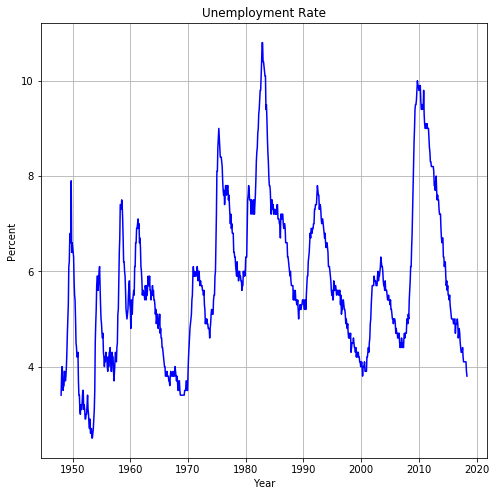

In [8]:
dd = pd.read_csv("LNS14000000.csv")
dd.rename(columns={'Value':'Both'}, inplace=True)

dd['Month'] = dd.index % 12
dd['Fyear'] = dd['Month']/12.0 + dd['Year']
dd.index = dd['Fyear']
ee = dd[['Year','Month','Both']]
print(ee.head(6))
print(ee.tail(6))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(dd.Both, color='b')
ax.grid(zorder=0)
ax.set_title("Unemployment Rate")
ax.set_xlabel("Year")
ax.set_ylabel("Percent")
#ax.legend(['Both'])


Note that the code reads the file LNS14000000.csv.  LNS14000000 is the series id for the monthly unemployment rate.  This series id can be obtained by going to [https://data.bls.gov/PDQWeb/ln](https://data.bls.gov/PDQWeb/ln), selecting "Unemployment rate" in section 7, checking just "Seasonally Adjusted" in section 8, checking "Monthly" in section 9, and clicking the "Add to selection" button.  The series id will be at the end of the line in the "Your selction" box, in this case "Both Sexes All Races All Origins 16 years and over All educational levels All marital statuses Unemployment rate Seasonally Adjusted Monthly : LNS14000000".  A csv file containing the data can then be obtained by going to [this link](https://beta.bls.gov/dataQuery/find?fq=survey:[ln]&s=popularity:D), entering the series id LNS14000000 in the Search box, checking the one match (in this case, "(Seas) Unemployment Rate"), click "View Data", change the Start Year to 1948, click "Update", and then click the ".CSV" button.  This will download a file to the standard Download directory which can then be renamed to LNS14000000.csv and moved to the same directory as this Jupyter Notebook.  This method can be followed to download the data for any BLS series.

As seen above, the unemployment rate did reach 3.8 percent in May.  This is the lowest rate since it reached 3.8 percent in April of 2000.

The [May Employment Report](https://www.bls.gov/news.release/pdf/empsit.pdf) goes on to mention another two employment measures:

> Both the labor force participation rate, at 62.7 percent, and the employment-population ratio, at 60.4 percent, changed little in May. (See table A-1.) 

The first of these measures is mentioned in a June 7th article in Quartz titled ["The dazzling US unemployment rate is blinding Americans to a much darker reality"](https://qz.com/1297561/the-dazzling-us-unemployment-rate-is-blinding-americans-to-a-much-darker-reality/).  The first mention is the following quote from Trump:

> Back in June 2015, he made this remark about the official unemployment rate (which was then 5.5%): “Our labor participation rate was the worst since 1978…. Our real unemployment is anywhere from 18 to 20%. Don’t believe the 5.6. Don’t believe it. That’s right. A lot of people out there can’t get jobs.”

The article then goes on to describe the labor force and its effect on the unemployment rate:

> The official labor force is made up of two types of people—those with jobs, obviously, but also the “unemployed,” defined as those ready to work who have actively looked for a job in the last four weeks.

> The unemployment rate captures the number of unemployed people as a share of the labor force. But it doesn’t tell you anything about people who stopped looking for work a month ago or more. This group has effectively dropped out of the labor force.

> So when the unemployment rate is falling, it could be for two reasons (or, more likely a combination of both). More people could be getting hired. Or more people might be giving up on trying to find work.

The article then describes how the current drop in the unemployment rate does not seem to be more for the second reason.  It then continues:

> Despite the rumored labor shortage that the media’s been hyping, the share of working-age Americans who have jobs or are trying to get them continues to slip. The labor force participation rate—the share of the civilian population ages 16 and older that is working or looking for work—dropped again in May. Now only 62.7% of people in that group have jobs or are actively trying to find one. (That’s about the same as in the late 1970s, before women joined the workforce en masse.)

The following code plots the labor force participation rate for men, women, and both since 1948.


             Year  Month   Men  Both  Women
Fyear                                      
1948.000000  1948      0  86.7  58.6   32.0
1948.083333  1948      1  87.0  58.9   32.4
1948.166667  1948      2  86.3  58.5   32.1
1948.250000  1948      3  86.6  59.0   33.0
1948.333333  1948      4  86.1  58.3   32.0
1948.416667  1948      5  86.6  59.2   33.4
             Year  Month   Men  Both  Women
Fyear                                      
2017.916667  2017     11  69.0  62.7   56.9
2018.000000  2018      0  69.2  62.7   56.7
2018.083333  2018      1  69.4  63.0   57.0
2018.166667  2018      2  69.3  62.9   56.9
2018.250000  2018      3  69.2  62.8   56.7
2018.333333  2018      4  69.2  62.7   56.7


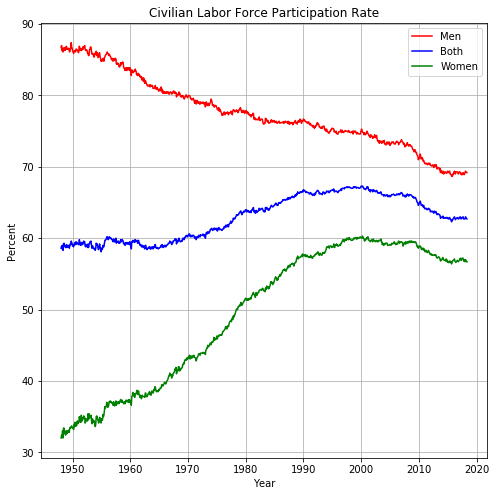

In [9]:
dd = pd.read_csv("LNS11300000.csv")
mm = pd.read_csv("LNS11300001.csv")
ww = pd.read_csv("LNS11300002.csv")
dd.rename(columns={'Value':'Both'}, inplace=True)
mm.rename(columns={'Value':'Men'}, inplace=True)
ww.rename(columns={'Value':'Women'}, inplace=True)
dd = pd.merge(dd, mm, on=['Year','Period'])
dd = pd.merge(dd, ww, on=['Year','Period'])

dd['Month'] = dd.index % 12
dd['Fyear'] = dd['Month']/12.0 + dd['Year']
dd.index = dd['Fyear']
ee = dd[['Year','Month','Men','Both','Women']]
print(ee.head(6))
print(ee.tail(6))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(dd.Men,   color=color3[0])
ax.plot(dd.Both,  color=color3[1])
ax.plot(dd.Women, color=color3[2])
ax.grid(zorder=0)
ax.set_title("Civilian Labor Force Participation Rate")
ax.set_xlabel("Year")
ax.set_ylabel("Percent")
ax.legend(['Men','Both','Women'])


As can be seen the combined labor force participation rate did drop from 62.8 to 62.7 percent in May and has been dropping since about 2000, both combined and for women.  For men, it's been dropping since 1948 but that drop appears to have sped up a bit after 2000 and especially after 2008.

Regarding this drop, the The Quartz article continues:

> That’s not just because America’s workforce is getting older. Despite this being the longest US economic expansion on record, a smaller share of workers aged 20 to 54 are currently in the workforce than when the last recession began, in Dec. 2007.

The following code looks at the labor force participation rate in 10-year age groups to largely nullify the effect of America's aging workforce:


             Year  Month  16-24  25-34  35-44  45-54  55-64   65+
Fyear                                                            
1948.000000  1948      0   59.7   62.5   66.0   64.5   56.4  25.5
1948.083333  1948      1   60.1   62.5   66.7   64.8   56.4  25.9
1948.166667  1948      2   59.5   62.1   66.9   64.4   56.4  25.7
1948.250000  1948      3   59.7   63.0   66.7   65.1   57.4  26.5
1948.333333  1948      4   58.3   62.5   66.2   64.3   56.9  27.1
1948.416667  1948      5   60.0   63.1   66.9   65.2   57.9  27.3
             Year  Month  16-24  25-34  35-44  45-54  55-64   65+
Fyear                                                            
2017.916667  2017     11   54.6   82.0   82.9   80.7   64.5  19.0
2018.000000  2018      0   55.8   81.9   82.9   80.7   64.1  18.8
2018.083333  2018      1   56.0   82.4   83.1   81.1   65.1  19.2
2018.166667  2018      2   56.0   82.5   83.0   80.7   64.6  19.5
2018.250000  2018      3   55.3   82.5   83.1   80.2   65.1  19.6
2018.33333

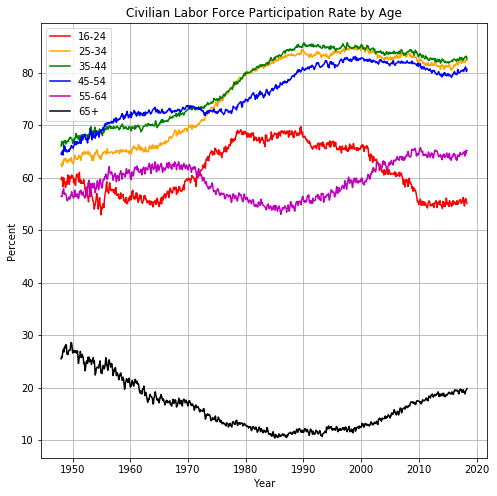

In [10]:
dd16 = pd.read_csv("LNS11324887.csv")
dd25 = pd.read_csv("LNS11300089.csv")
dd35 = pd.read_csv("LNS11300091.csv")
dd45 = pd.read_csv("LNS11300093.csv")
dd55 = pd.read_csv("LNU01300095.csv")
dd65 = pd.read_csv("LNU01300097.csv")
dd16.rename(columns={'Value':'16-24'}, inplace=True)
dd25.rename(columns={'Value':'25-34'}, inplace=True)
dd35.rename(columns={'Value':'35-44'}, inplace=True)
dd45.rename(columns={'Value':'45-54'}, inplace=True)
dd55.rename(columns={'Value':'55-64'}, inplace=True)
dd65.rename(columns={'Value':'65+'}, inplace=True)
dd = pd.merge(dd16, dd25, on=['Year','Period'])
dd = pd.merge(dd,   dd35, on=['Year','Period'])
dd = pd.merge(dd,   dd45, on=['Year','Period'])
dd = pd.merge(dd,   dd55, on=['Year','Period'])
dd = pd.merge(dd,   dd65, on=['Year','Period'])

dd['Month'] = dd.index % 12
dd['Fyear'] = dd['Month']/12.0 + dd['Year']
dd.index = dd['Fyear']
ee = dd[['Year','Month','16-24','25-34','35-44','45-54','55-64','65+']]
print(ee.head(6))
print(ee.tail(6))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(dd['16-24'], color=color6[0])
ax.plot(dd['25-34'], color=color6[1])
ax.plot(dd['35-44'], color=color6[2])
ax.plot(dd['45-54'], color=color6[3])
ax.plot(dd['55-64'], color=color6[4])
ax.plot(dd['65+'], color=color6[5])
ax.grid(zorder=0)
ax.set_title("Civilian Labor Force Participation Rate by Age")
ax.set_xlabel("Year")
ax.set_ylabel("Percent")
ax.legend(['16-24','25-34','35-44','45-54','55-64','65+'])


As can be seen, the labor force participation rate has been dropping for all age groups under age 55 since 1990 or 2000.  Interestingly, the 16-24 age group saw its rate increase in the mid 60s and began declining to about that original level after 2000.  Also interestingly, the rate for the workers 55 and over began increasing in the mid 80s.  Several reasons for the increased rate for older workers are suggested in a CNN Money article titled [The US economy needs seniors to work longer. Here's how to make that happen](http://money.cnn.com/2018/06/02/news/economy/older-workers-retirement-economy/index.html).  It states:

> Seniors are mostly [working longer](https://www.ssa.gov/policy/docs/ssb/v72n1/v72n1p59.html) because they need the money. Hikes in Social Security's retirement age, a sinking savings rate, mounting personal debt and a shift away from employer-provided pensions have made it harder than it was in the 1960s and 70s to retire.

A measure that's related to the labor force participation rate is the employment-population ratio. The following code plots this measure for men, women, and both since 1948.


             Year  Month   Men  Both  Women
Fyear                                      
1948.000000  1948      0  83.8  56.6   30.9
1948.083333  1948      1  83.9  56.7   31.0
1948.166667  1948      2  83.0  56.1   30.7
1948.250000  1948      3  83.3  56.7   31.6
1948.333333  1948      4  83.1  56.2   30.9
1948.416667  1948      5  83.7  57.0   31.9
             Year  Month   Men  Both  Women
Fyear                                      
2017.916667  2017     11  66.1  60.1   54.6
2018.000000  2018      0  66.3  60.1   54.4
2018.083333  2018      1  66.5  60.4   54.7
2018.166667  2018      2  66.5  60.4   54.6
2018.250000  2018      3  66.4  60.3   54.6
2018.333333  2018      4  66.5  60.4   54.7


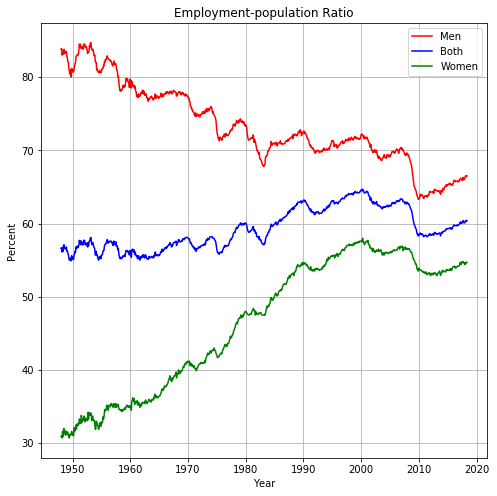

In [11]:
dd = pd.read_csv("LNS12300000.csv")
mm = pd.read_csv("LNS12300001.csv")
ww = pd.read_csv("LNS12300002.csv")
dd.rename(columns={'Value':'Both'}, inplace=True)
mm.rename(columns={'Value':'Men'}, inplace=True)
ww.rename(columns={'Value':'Women'}, inplace=True)
dd = pd.merge(dd, mm, on=['Year','Period'])
dd = pd.merge(dd, ww, on=['Year','Period'])

dd['Month'] = dd.index % 12
dd['Fyear'] = dd['Month']/12.0 + dd['Year']
dd.index = dd['Fyear']
ee = dd[['Year','Month','Men','Both','Women']]
print(ee.head(6))
print(ee.tail(6))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(dd.Men,   color=color3[0])
ax.plot(dd.Both,  color=color3[1])
ax.plot(dd.Women, color=color3[2])
ax.grid(zorder=0)
ax.set_title("Employment-population Ratio")
ax.set_xlabel("Year")
ax.set_ylabel("Percent")
ax.legend(['Men','Both','Women'])


As can be seen, it appears to be less-smooth version of the labor force participation rate.  That's because, instead of being the ratio of the labor force to the population, it's the ratio of employed workers to the population.  In fact, the employment-population ratio is exactly equal to the employment rate multiplied by the labor force participation rate.  This can be seen in the following formula:

    employment-                labor force
    population   employment    participation
      ratio         rate          rate
    ==========   ===========   =============
    employment   employment    labor force
    ---------- = ----------- * -----------
    population   labor force   population

The employment rate is equal to 100% (or 1.0) minus the unemployment rate.  Hence, for May 2018, this formula becomes 60.4% = 96.2% * 62.7% or 0.604 = 0.962 * 0.627.

In any event, this measure is useful in that it essentially combines the effect of the unemployment rate and the labor force participation rate.  As can be seen, the employment-population ratio dropped after the 2001 tech crash and partially recovered by 2008.  It then dropped much more during the financial crisis and appears to have recovered no more than half of its loss.

The following code looks at the employment-population ratio in 10-year age groups to largely nullify the effect of America's aging workforce:


             Year  Month  16-24  25-34  35-44  45-54  55-64   65+
Fyear                                                            
1948.000000  1948      0   55.6   60.6   64.6   63.0   54.4  24.5
1948.083333  1948      1   55.5   60.5   65.1   63.0   54.1  24.9
1948.166667  1948      2   54.3   60.3   65.0   62.7   54.6  24.6
1948.250000  1948      3   55.0   60.9   64.7   63.4   55.4  25.7
1948.333333  1948      4   54.4   60.7   64.5   62.8   55.3  26.2
1948.416667  1948      5   55.6   61.3   65.2   63.6   56.4  26.6
             Year  Month  16-24  25-34  35-44  45-54  55-64   65+
Fyear                                                            
2017.916667  2017     11   49.7   78.4   80.4   78.5   62.5  18.4
2018.000000  2018      0   50.7   78.4   80.3   78.3   62.0  18.1
2018.083333  2018      1   50.9   78.8   80.5   78.7   62.8  18.5
2018.166667  2018      2   51.2   79.0   80.4   78.4   62.5  18.9
2018.250000  2018      3   50.6   78.9   80.6   78.0   63.2  19.0
2018.33333

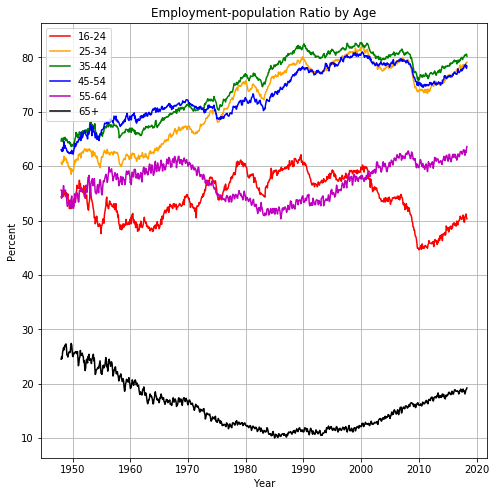

In [12]:
dd16 = pd.read_csv("LNS12324887.csv")
dd25 = pd.read_csv("LNS12300089.csv")
dd35 = pd.read_csv("LNS12300091.csv")
dd45 = pd.read_csv("LNS12300093.csv")
dd55 = pd.read_csv("LNU02300095.csv")
dd65 = pd.read_csv("LNU02300097.csv")
dd16.rename(columns={'Value':'16-24'}, inplace=True)
dd25.rename(columns={'Value':'25-34'}, inplace=True)
dd35.rename(columns={'Value':'35-44'}, inplace=True)
dd45.rename(columns={'Value':'45-54'}, inplace=True)
dd55.rename(columns={'Value':'55-64'}, inplace=True)
dd65.rename(columns={'Value':'65+'}, inplace=True)
dd = pd.merge(dd16, dd25, on=['Year','Period'])
dd = pd.merge(dd,   dd35, on=['Year','Period'])
dd = pd.merge(dd,   dd45, on=['Year','Period'])
dd = pd.merge(dd,   dd55, on=['Year','Period'])
dd = pd.merge(dd,   dd65, on=['Year','Period'])

dd['Month'] = dd.index % 12
dd['Fyear'] = dd['Month']/12.0 + dd['Year']
dd.index = dd['Fyear']
ee = dd[['Year','Month','16-24','25-34','35-44','45-54','55-64','65+']]
print(ee.head(6))
print(ee.tail(6))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(dd['16-24'], color=color6[0])
ax.plot(dd['25-34'], color=color6[1])
ax.plot(dd['35-44'], color=color6[2])
ax.plot(dd['45-54'], color=color6[3])
ax.plot(dd['55-64'], color=color6[4])
ax.plot(dd['65+'], color=color6[5])
ax.grid(zorder=0)
ax.set_title("Employment-population Ratio by Age")
ax.set_xlabel("Year")
ax.set_ylabel("Percent")
ax.legend(['16-24','25-34','35-44','45-54','55-64','65+'])


As with the labor force participation rate, the employment-population ratio has been dropping for all age groups under age 55 since 1990 or 2000. Also, the 16-24 age group saw its rate increase in the mid 60s and began declining to about that original level after 2000 and the rate for the workers 55 and over began increasing in the mid 80s.  In addition, the 16-24 age group appears to have been hit especially hard by the 2000 and 2008 crashes.  In constrast, the 55-64 age group appears to have been affected only a relatively small amount by the financial crisis.  Even more interestingly, the 65 and over age group appears not to have been effected by either the 2000 or 2008 crash.

Regarding the decline in the labor force participation rate, an article titled [Labor Force Participation Rate and Why It Won't Improve](https://www.thebalance.com/labor-force-participation-rate-formula-and-examples-3305805) lists five reasons.  Following are excerpts from those reasons:

> Half of the decline is due to the [aging of America](https://www.wsj.com/articles/how-demographics-rule-the-global-economy-1448203724), according to the [Federal Reserve Bank of Atlanta](https://www.frbatlanta.org/chcs/labor-force-participation-dynamics.aspx?d=1&s=tw). These demographic changes affected the labor force even before the recession.

> Second, 24 percent of the unemployed have been without a job for six months or more. Only 10 percent of these [long-term unemployed](https://www.thebalance.com/long-term-unemployment-what-it-is-causes-and-effects-3305518) find a job each month. It became so frustrating that many dropped out of the labor force. They may never return. They don't have updated skills and employers aren't willing to take a chance with them.

> Third, millions who left the labor force were between the ages of 25 and 54. That's prime earning years. ... But anyone who wasn't employed during their prime earning years [may never get a chance to recover their careers](http://www.barrons.com/articles/the-mystery-of-the-missing-workers-1426298990).

> Fourth is the [increased use of opioid medication](https://www.brookings.edu/wp-content/uploads/2017/09/1_krueger.pdf). Almost half of prime age men not in the labor force take pain medication daily to treat chronic health conditions. Two thirds of them are on prescription meds.

> Fifth, is the increasing number of people too sick or disabled to work. For example, 13.2 percent of those aged 56 - 60 cite that reason for not being in the labor force. 

Note: The Jupyter Notebook from which this post is generated can be found at http://econdataus.com/bls1.ipynb.
